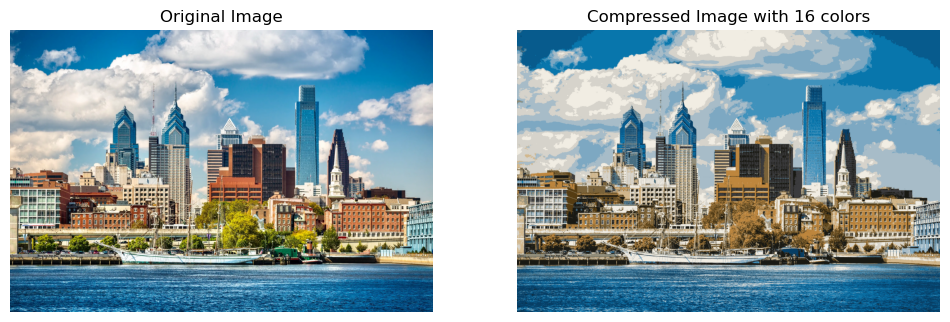

In [1]:
import numpy as np  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
from PIL import Image  
  
def load_image(image_path):  
    """  
    加载图片并转换为numpy数组  
    """  
    image = Image.open(image_path)  
      
    # 检查图像是否为灰度图像  
    if image.mode == 'L':  
        # 如果是灰度图像，则直接转换为numpy数组  
        image_np = np.array(image)  
    else:  
        # 如果是彩色图像，则转换为RGB并获取numpy数组  
        image = image.convert('RGB')  
        image_np = np.array(image)  
      
    return image_np  


def compress_image(image_np, n_colors):  
    """  
    使用K-means算法压缩图片  
    """  
    if len(image_np.shape) == 2:  
        # 灰度图像  
        h, w = image_np.shape  
        image_reshaped = image_np.reshape(-1, 1)  # 将图片数据转换为二维数组（h*w, 1）
        # 使用K-means算法进行聚类
        kmeans = KMeans(n_clusters=n_colors, random_state=42)  
        kmeans.fit(image_reshaped)
        # 获取聚类标签 
        labels = kmeans.labels_  
        # 获取聚类中心（即新的颜色）
        centers = kmeans.cluster_centers_
        # 用聚类中心的颜色替换原始图片的颜色
        compressed_image = centers[labels].reshape(h, w).astype(np.uint8)  
    else:  
        # 彩色图像  
        h, w, c = image_np.shape # 获取图片的尺寸 
        image_reshaped = image_np.reshape(-1, 3)  # 将图片数据转换为二维数组（h*w, c）
        # 使用K-means算法进行聚类 
        kmeans = KMeans(n_clusters=n_colors, random_state=42)  
        kmeans.fit(image_reshaped)  
        # 获取聚类标签 
        labels = kmeans.labels_  
        # 获取聚类中心（即新的颜色）  
        centers = kmeans.cluster_centers_  
        # 用聚类中心的颜色替换原始图片的颜色  
        compressed_image = centers[labels].reshape(h, w, c).astype(np.uint8)  
      
    return compressed_image  
  
def save_image(image_np, output_path):  
    """  
    将numpy数组保存为图片  
    """  
    image = Image.fromarray(image_np)  
    image.save(output_path)  

def main(image_path, output_path, n_colors):  
    # 加载图片  
    image_np = load_image(image_path)  
    # 压缩图片  
    compressed_image = compress_image(image_np, n_colors)  
    # 保存压缩后的图片  
    save_image(compressed_image, output_path)  
      
    # 显示原始图片和压缩后的图片  
    original_image = Image.open(image_path)  
    original_image_np = np.array(original_image)  
      
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  
      
    if len(original_image_np.shape) == 2:  
        # 灰度图像  
        ax[0].imshow(original_image_np, cmap='gray')  
        ax[1].imshow(compressed_image, cmap='gray')  
    else:  
        # 彩色图像  
        ax[0].imshow(original_image_np)  
        ax[1].imshow(compressed_image)  
      
    ax[0].set_title("Original Image")  
    ax[0].axis('off')  
      
    ax[1].set_title(f"Compressed Image with {n_colors} colors")  
    ax[1].axis('off')  
      
    plt.show()
  
# 示例使用  
image_path = 'test.jpg'  # 替换为你的图片路径  
output_path = 'compressed_image.jpg'  
n_colors = 16  # 选择要压缩到的颜色数量（对于灰度图像，这将是灰度级别数）  
  
main(image_path, output_path, n_colors)